In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn import model_selection
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Loading the data

In [2]:
stats_df = pd.read_csv('NBA_future_PER_data.csv')
stats_df_copy = stats_df.copy()
#Drop columns that won't help our model
stats_df.drop(["Player", "Year","Pos", "Tm","GS","MP","G"],axis=1, inplace = True)


### Linear Regresion

In [3]:
#Split the dataframe to train and test
X_train1,X_test1,y_train1,y_test1 = train_test_split(stats_df.drop(['Future_PER'],axis=1),stats_df['Future_PER'],test_size=0.3,random_state=42)

In [4]:
#Fit the model
lr = linear_model.LinearRegression()
lr.fit(X_train1,y_train1)

LinearRegression()

In [5]:
#Predict the outcome
y_pred1 = lr.predict(X_test1)
y_pred1

array([ 9.77503803, 16.87295662, 17.8373147 , ..., 20.77250348,
       10.99409702, 12.17924779])

In [6]:
#Check the results of the model
print(f'r^2: {metrics.r2_score(y_test1,y_pred1)}')
print(f'mse: {metrics.mean_squared_error(y_test1,y_pred1)}')


r^2: 0.6674933026874257
mse: 7.515896528902196


Text(0, 0.5, 'Predicted')

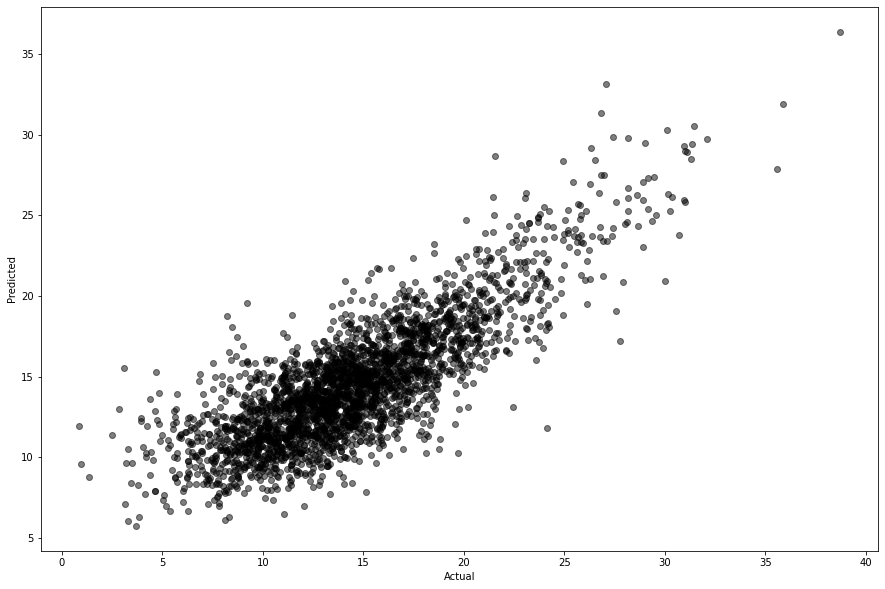

In [7]:
#We can see that our model predicted the PER with good results
plt.figure(figsize=(15,10))
plt.scatter(y_test1,y_pred1,color = 'k', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [8]:
#Check the difference between the predicted value and the actual value
compare_df = pd.DataFrame({'Actual':y_test1,'Predicted':y_pred1,'Difference':abs(y_test1-y_pred1)})
compare_df

Actual  Predicted  Difference
4078   11.43   9.775038    1.654962
4132   13.99  16.872957    2.882957
7415   16.76  17.837315    1.077315
7023   16.78  17.916273    1.136273
5993   12.00  13.613739    1.613739
...      ...        ...         ...
3688   23.99  25.512303    1.522303
9197   15.15  18.640347    3.490347
756    24.10  20.772503    3.327497
2644   10.29  10.994097    0.704097
3325    5.68  12.179248    6.499248

[2838 rows x 3 columns]

### Decision Tree Regressor


In [9]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor()

In [10]:
#Split the dataframe to train and test
X_train2,X_test2,y_train2,y_test2 = train_test_split(stats_df.drop(['Future_PER'],axis=1),stats_df['Future_PER'],test_size=0.3,random_state=42)

In [11]:
#Fit the model
DecisionTreeRegressor(random_state=42)
dectree.fit(X_train2,y_train2)

DecisionTreeRegressor()

In [12]:
#Predict the outcome
y_pred2 = dectree.predict(X_test2)
y_pred2

array([ 8.65, 17.56, 16.16, ..., 27.79, 10.21, 13.08])

In [13]:
#Check the results of the model
print(f'r^2: {metrics.r2_score(y_test2,y_pred2)}')
print(f'mse: {metrics.mean_squared_error(y_test2,y_pred2)}')


r^2: 0.3317273229564509
mse: 15.105465045806907


Text(0, 0.5, 'Predicted')

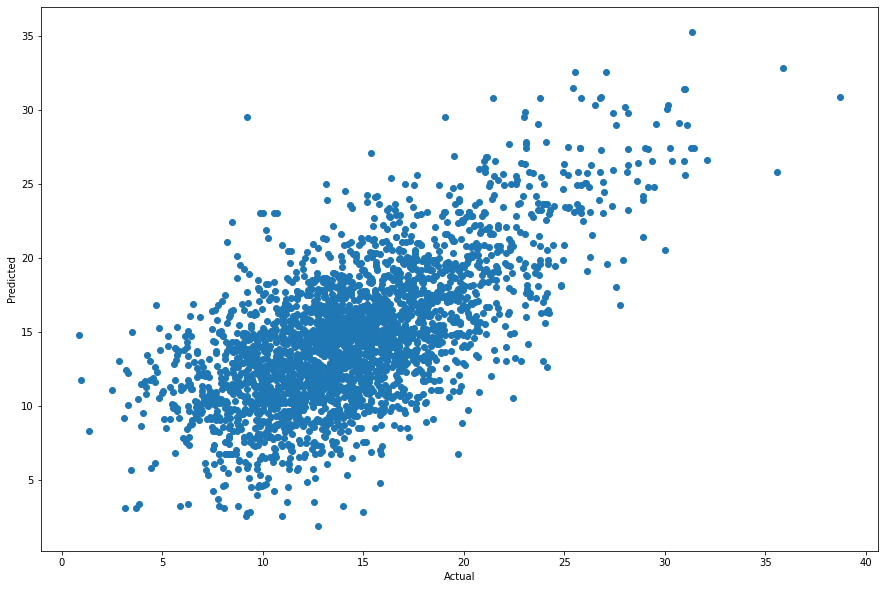

In [14]:
#We can see that our model predicted the PER with less better results
plt.figure(figsize=(15,10))
plt.scatter(y_test2,y_pred2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [15]:
#Check the difference between the predicted value and the actual value
compare_df2 = pd.DataFrame({'Actual':y_test2,'Predicted':y_pred2,'Difference':abs(y_test2-y_pred2)})
compare_df2

Actual  Predicted  Difference
4078   11.43       8.65        2.78
4132   13.99      17.56        3.57
7415   16.76      16.16        0.60
7023   16.78      19.92        3.14
5993   12.00      16.13        4.13
...      ...        ...         ...
3688   23.99      23.66        0.33
9197   15.15      18.91        3.76
756    24.10      27.79        3.69
2644   10.29      10.21        0.08
3325    5.68      13.08        7.40

[2838 rows x 3 columns]

### Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
rndfor= RandomForestRegressor()

In [17]:
#Split the dataframe to train and test
X_train3,X_test3,y_train3,y_test3 = train_test_split(stats_df.drop(['Future_PER'],axis=1),stats_df['Future_PER'],test_size=0.3,random_state=42)

In [18]:
#Fit the model
RandomForestRegressor(random_state=42)
rndfor.fit(X_train3,y_train3)

RandomForestRegressor()

In [19]:
#Predict the outcome
y_pred3 = rndfor.predict(X_test3)
y_pred3

array([ 9.3948, 16.4671, 16.2638, ..., 21.5544, 10.0538, 12.0074])

In [20]:
#Check the results of the model
print(f'r^2: {metrics.r2_score(y_test3,y_pred3)}')
print(f'mse: {metrics.mean_squared_error(y_test3,y_pred3)}')

r^2: 0.6567078642358677
mse: 7.759687827170542


Text(0, 0.5, 'Predicted')

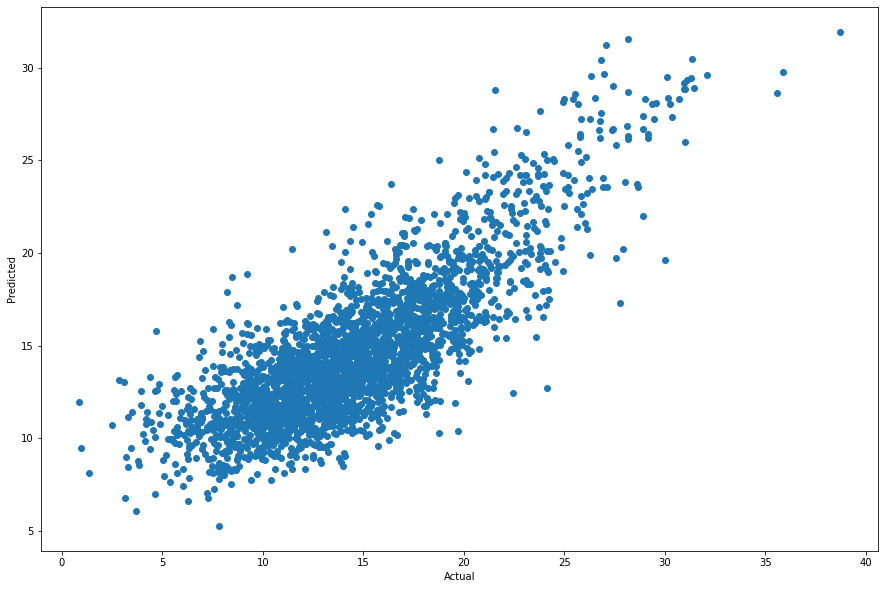

In [21]:
#We can see that our model predicted the PER with almost as good as linear regression results
plt.figure(figsize=(15,10))
plt.scatter(y_test3,y_pred3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [22]:
#Check the difference between the predicted value and the actual value
compare_df3 = pd.DataFrame({'Actual':y_test3,'Predicted':y_pred3,'Difference':abs(y_test3-y_pred3)})
compare_df3

Actual  Predicted  Difference
4078   11.43     9.3948      2.0352
4132   13.99    16.4671      2.4771
7415   16.76    16.2638      0.4962
7023   16.78    17.2931      0.5131
5993   12.00    12.5967      0.5967
...      ...        ...         ...
3688   23.99    25.3554      1.3654
9197   15.15    17.5884      2.4384
756    24.10    21.5544      2.5456
2644   10.29    10.0538      0.2362
3325    5.68    12.0074      6.3274

[2838 rows x 3 columns]

### MSE and R^2 score comparison

In [23]:
#Create dataframe for comparison of algorithms
r2_mse_comp_data = {'r^2':[metrics.r2_score(y_test1,y_pred1),metrics.r2_score(y_test2,y_pred2),metrics.r2_score(y_test3,y_pred3)],
                  'MSE':[metrics.mean_squared_error(y_test1,y_pred1),metrics.mean_squared_error(y_test2,y_pred2),
                         metrics.mean_squared_error(y_test3,y_pred3)]}
r2_mse_comp_df= pd.DataFrame(r2_mse_comp_data,index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor'])
r2_mse_comp_df

r^2        MSE
Linear Regression        0.667493   7.515897
Decision Tree Regressor  0.331727  15.105465
Random Forest Regressor  0.656708   7.759688

<module 'matplotlib.pyplot' from 'E:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

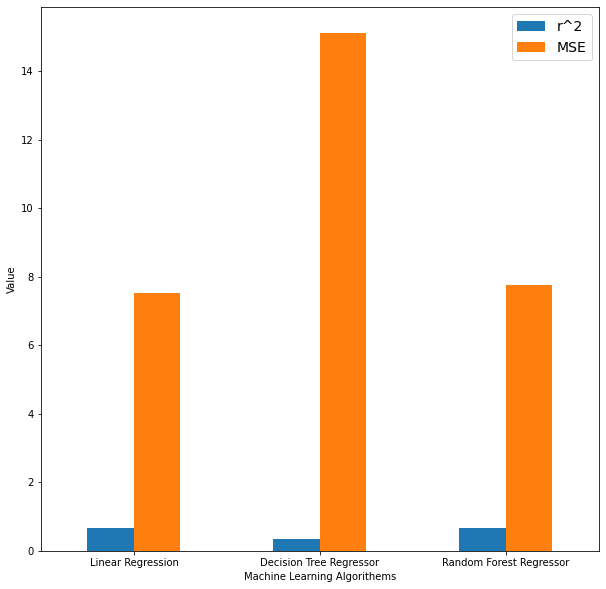

In [24]:
#We can see that the best algorithem is the one with the largest r^2 score and the minimal MSE score, meaning Linear Regression.
r2_mse_comp_df.plot.bar(rot=0,figsize=(10,10))
plt.legend(fontsize = 14)
plt.xlabel('Machine Learning Algorithems')
plt.ylabel('Value')
plt



### We can see that the Linear Regression has the besr r^2 score and the lowest mean square error